In [1]:
%run 3.DataExploratorAnalysis.ipynb

PART ONE
EmpNumber
Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
OverTime
Attrition
EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     

F:\kid stuff\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#handeling catagorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df.Gender = labelEncoder.fit_transform(df.Gender)
df.EducationBackground = labelEncoder.fit_transform(df.EducationBackground)
df.MaritalStatus = labelEncoder.fit_transform(df.MaritalStatus)
df.EmpDepartment = labelEncoder.fit_transform(df.EmpDepartment)
df.BusinessTravelFrequency = labelEncoder.fit_transform(df.BusinessTravelFrequency)
df.Attrition = labelEncoder.fit_transform(df.Attrition)
df.OverTime = labelEncoder.fit_transform(df.OverTime)

In [3]:
#creaing dummy variables
EmpJobRole_dummy = pd.get_dummies(df.EmpJobRole).drop('Technical Architect',axis=1)

In [4]:
#concating dummy variables to dataframe
df = df.drop("EmpJobRole",axis=1)
df = pd.concat([df , EmpJobRole_dummy],axis=1)

In [5]:
df.shape

(1200, 45)

In [6]:
#setting up dependent and independent variables
X = df.drop(['PerformanceRating','EmpNumber'],axis=1)
y = df['PerformanceRating']

In [7]:
#saving the column names
col = X.columns

In [8]:
#normalization of data
from sklearn.preprocessing import scale
X = scale(X)

In [9]:
X = pd.DataFrame(data=X , columns=col)

In [10]:
#splitting data into train test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

F:\kid stuff\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Defining Random Forest model
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=17)

In [12]:
#Training the model
random_forest_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
#Predicting the y-target
y_predict = random_forest_model.predict(X_test)

In [14]:
#Accuaray checking
from sklearn.metrics import accuracy_score , confusion_matrix
random_forest_model_acc = accuracy_score(y_test , y_predict)
print(random_forest_model_acc)

0.9041666666666667


## <span style='color:blue'>We achieved 91% efficiency using the Random Forest model, without feature selection.</span>

In [15]:
confusion_matrix(y_test , y_predict)

array([[ 19,   8,   2],
       [  2, 179,   3],
       [  0,   8,  19]], dtype=int64)

In [16]:
#getting feature importance for feature selection
importance = random_forest_model.feature_importances_

In [17]:
#creating dataframe for feature importance
feature_importance = pd.DataFrame({"Columns":col , "Degree of impact":importance})
feature_importance = feature_importance.sort_values('Degree of impact',ascending=True)

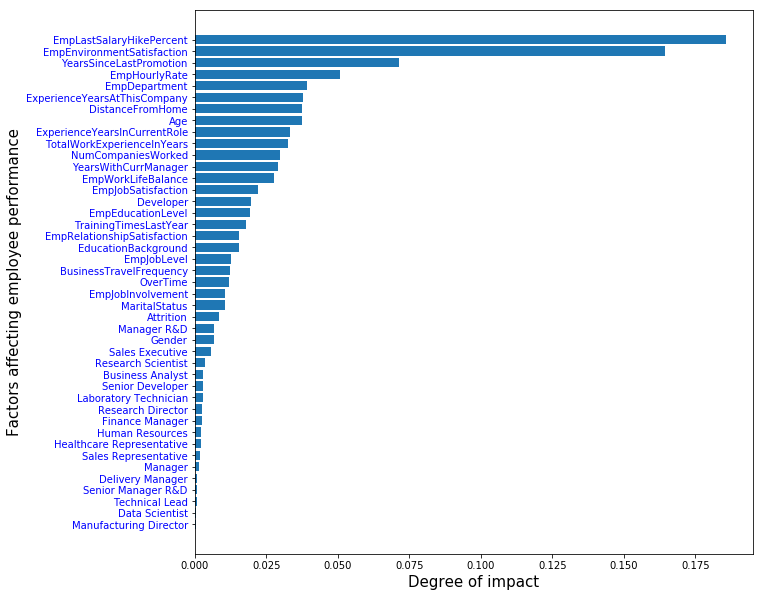

In [18]:
#visulizing feature importance 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
plt.barh(range(len(feature_importance['Degree of impact'])), feature_importance['Degree of impact'])
plt.yticks(range(len(feature_importance['Columns'])), feature_importance['Columns'],color='blue',fontsize=10)
plt.xlabel("Degree of impact",fontsize=15)
plt.ylabel("Factors affecting employee performance",fontsize=15)
plt.show()


In [19]:
#removing less importance features
cols = EmpJobRole_dummy.columns

In [20]:
#selected features
XX_train = X_train.drop(cols , axis=1)
XX_test  = X_test.drop(cols , axis=1)

In [21]:
#Deleting overtime and Attrition
XX_train = XX_train.drop(['OverTime','Attrition'] , axis=1)
XX_test  = XX_test.drop(['OverTime','Attrition'] , axis=1)

In [22]:
#Defining Random Forest with feature enginerring model
random_forest_model2 = RandomForestClassifier(n_estimators=19)

In [23]:
#Training model
random_forest_model2.fit(XX_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
#Predicting y-target
yy_predict = random_forest_model2.predict(XX_test)

In [25]:
random_forest_model2_acc = accuracy_score(y_test , yy_predict)
print(random_forest_model2_acc)

0.9208333333333333


## <span style='color:blue'>We achieved 94% efficiency using the Random Forest model, with feature selection.</span>

In [26]:
confusion_matrix(y_test , yy_predict)

array([[ 26,   3,   0],
       [  4, 178,   2],
       [  0,  10,  17]], dtype=int64)

In [27]:
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
svc_linear = svm.SVC(kernel='linear',C=1)
#TRAINING MODEL
svc_linear.fit(XX_train , y_train)
#predicting Y target
predicted= svc_linear.predict(XX_test)
print(accuracy_score(y_test , predicted))
SVM_model=accuracy_score(y_test , predicted)

0.8625


# <span style='color:blue'>We achieved 86% efficiency using the SVM model, with feature selection.</span>

In [28]:
confusion_matrix(y_test , predicted)

array([[ 16,  13,   0],
       [ 10, 173,   1],
       [  0,   9,  18]], dtype=int64)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model3 = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn_model3.fit(XX_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
y_predict_knn = knn_model3.predict(XX_test)


In [32]:
knn_model3_acc=accuracy_score(y_test , y_predict_knn)
print(knn_model3_acc)

0.8125


## <span style='color:blue'>We achieved 81% efficiency using the K-Nearest Neighbours model, with feature selection.</span>

In [33]:
confusion_matrix(y_test , y_predict_knn)

array([[  9,  20,   0],
       [  6, 176,   2],
       [  2,  15,  10]], dtype=int64)

In [34]:
#Selecting the most effecient model with 93.75% accuracy.
pd.DataFrame({"model":["random_forest_model","random_forest_model2","knn_model3","SVM_model"],
             "accuracy":[random_forest_model_acc,random_forest_model2_acc,knn_model3_acc,SVM_model]})

,model,accuracy
0,random_forest_model,0.904167
1,random_forest_model2,0.920833
2,knn_model3,0.812500
3,SVM_model,0.862500


### With 93% efficiency, we recommend Random Forest model to predict Employee Performance based on factors as inputs. This model could be used ato improve hiring decisions.

# <span style='color:blue'>Recommendations improve the employee performance based on insights from analysis.<span>

### 1) Candidates between 31years to 40 years of age tend to Perform better at Ranking 4.
### 2) Candidates with +15 years total experience tend to be average performers. (Rating3)
### 3) Candidates with 12 to 15 years of experience show higher probability of better performance (Rating4)
### 4) Candidates with 1 year of experience have very high probaility of high-performance (Rating4) however, these candidates also have at least 50% probability of attrition.